In [170]:
import math

#计算香农熵
def calcShannonEnt(dataset):
    num=len(dataset)
    labelcounts={}
    for item in dataset:
        label=item[-1]
        labelcounts[label]=labelcounts.get(label,0)+1
    ShannonEnt=0.0
    for value in labelcounts.values():
        prob=float(value)/num
        ShannonEnt-=prob*math.log(prob,2)
    return ShannonEnt

In [171]:
#根据特征和值划分数据
def splitData(dataset,feat,value):
    splitresult=[]
    for sample in dataset:
        if sample[feat]==value:
            temp=sample[:feat]
            temp.extend(sample[feat+1:])
            splitresult.append(temp)
    return splitresult

In [172]:
mydata = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
labels = ['no surfacing','flippers']

In [173]:
splitData(mydata,1,1)

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [214]:
#选取最大信息增益的特征值
def choosebestfeat(dataset):
    featnum=len(dataset[0])-1
    oldEnv=calcShannonEnt(dataset)
    maxincreaseInfo=0
    bestfeat=-1
    for i in range(featnum):
        uniqvalue=set([example[i] for example in dataset])
        newEnt=0.0
        for value in uniqvalue:
            subdataset=splitData(dataset,i,value)
            percent=float(len(subdataset))/len(dataset)
            newEnt+=percent*calcShannonEnt(subdataset)
            increaseInfo=oldEnv-newEnt
        if increaseInfo>maxincreaseInfo:
            bestfeat=i
            maxincreaseInfo=increaseInfo
    return bestfeat

In [215]:
choosebestfeat(mydata)

0

In [216]:
print splitData(mydata,0,1)
print splitData(mydata,0,0)

[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [217]:
#最大表决原则
def majoecount(classlist):
    labelcounts={}
    for item in classlist:
        labelcounts[item[-1]]=labelcounts.get(ite[-1],0)+1
    labelorder=sorted(labelcounts.iteritems(),key=lambda d:d[1],reverse=True)
    return labelorder[0][0]

In [218]:
#创建决策树
def createTree(dataset,labels):
    classList=[example[-1] for example in dataset]
    if len(set(classList))==1:
        return classList[0]
    if len(dataset[0])==1:
        return majoecount(classList)
    bestfeat=choosebestfeat(dataset)
    bestlabel=labels[bestfeat]
    mytree={}
    mytree[bestlabel]={}
    newlabels=labels[:bestfeat]
    newlabels.extend(labels[bestfeat+1:]) 
    uniqvalue=set([example2[bestfeat] for example2 in dataset])
    for value in uniqvalue:
        mytree[bestlabel][value]=createTree(splitData(dataset,bestfeat,value),newlabels)
    return mytree

In [219]:
mytree=createTree(mydata,labels)

In [220]:
#plot函数的初识
import matplotlib.pyplot as plt
#boxstyle存储边框类型,fc存储透明度
decisionNode=dict(boxstyle='sawtooth',fc='0.8')
leafNode=dict(boxstyle='round4',fc='0.8')
arrow_args=dict(arrowstyle='<-')
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',
                           va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)
def createPlot():
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode('a decision node',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('a leaf node',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

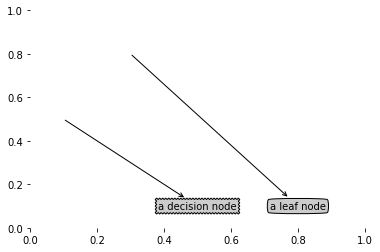

In [221]:
createPlot()

In [222]:
#获取叶节点数目和树的层数
def getLeafsNum(mytree):
    leafNum=0
    surfacekey=mytree.keys()[0]
    value=mytree[surfacekey]
    for item in value.keys():
        if type(value[item]).__name__!='dict':
            leafNum+=1
        else:
            leafNum+=getLeafsNum(value[item])
    return leafNum

def getDepth(mytree):
    depth=1
    maxdepth=1
    surfacekey=mytree.keys()[0]
    value=mytree[surfacekey]
    for item in value.keys():
        if type(value[item]).__name__=='dict':
            depth+=getDepth(value[item])
        else:
            continue
        if depth>maxdepth:
            maxdepth=depth
    return maxdepth

In [223]:
print mytree
print getLeafsNum(mytree)
print getDepth(mytree)

{'age': {0: 'no', 1: {'prescript': {0: 'no', 1: 'yes'}}}}
3
2


In [224]:
###绘制树形图

#绘制父子节点中间的特征值
def plotMidText(cntrPt,parentPt,txt):
    xMid=(cntrPt[0]+parentPt[0])/2.0
    yMid=(cntrPt[1]+parentPt[1])/2.0
    createPlot.ax1.text(xMid,yMid,txt)

def plotTree(mytree,parentPt,nodeText):
    leafsNum=getLeafsNum(mytree)
    treedepth=getDepth(mytree)
    surfacekey=mytree.keys()[0]
    cntrPt=(plotTree.xoff+(1.0+float(leafsNum))/2.0/plotTree.totalW,plotTree.yoff)
    plotMidText(cntrPt,parentPt,nodeText)
    plotNode(surfacekey,cntrPt,parentPt,decisionNode)
    secondDic=mytree[surfacekey]
    plotTree.yoff= plotTree.yoff-1.0/plotTree.totalD
    for key in secondDic.keys():
        if type(secondDic[key]).__name__=='dict':
            plotTree(secondDic[key],cntrPt,str(key))
        else:
            plotTree.xoff=plotTree.xoff+1.0/plotTree.totalW
            plotNode(secondDic[key],(plotTree.xoff,plotTree.yoff),cntrPt,leafNode)
            plotMidText((plotTree.xoff,plotTree.yoff),cntrPt,str(key))
    plotTree.yoff= plotTree.yoff+1.0/plotTree.totalD
    
def createPlot(inTree):
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(getLeafsNum(inTree))
    plotTree.totalD=float(getDepth(inTree))
    plotTree.xoff=-0.5/plotTree.totalW
    plotTree.yoff=1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

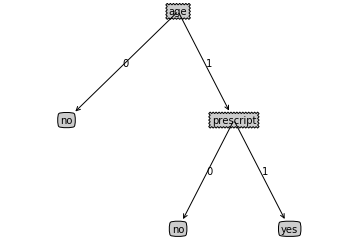

In [225]:
createPlot(mytree)

In [226]:
#根据模型预测
def classify(inputTree,inputlabels,testdata):
    predict=''
    surfacekey=inputTree.keys()[0]
    seconDic=inputTree[surfacekey]
    index=inputlabels.index(surfacekey)
    if type(seconDic[testdata[index]]).__name__!='dict':
        predict=seconDic[testdata[index]]
    else:
        predict=classify(seconDic[testdata[index]],inputlabels,testdata)
    return predict

In [227]:
print mytree
print classify(mytree,labels,[1,1])

{'age': {0: 'no', 1: {'prescript': {0: 'no', 1: 'yes'}}}}
yes


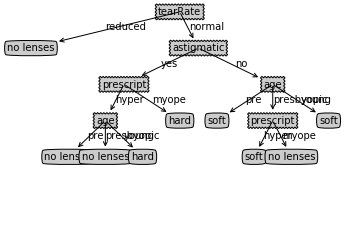

soft


In [229]:
fr=open('lenses.txt','r')
lines=fr.readlines()
inputMatrix=[]
for line in lines:
    words=line.strip().split('\t')
    inputMatrix.append(words)
labels=['age','prescript','astigmatic','tearRate']
tree=createTree(inputMatrix,labels)
createPlot(tree)
print classify(tree,labels,['young', 'hyper', 'no', 'normal'])